La prediccion del modelo vgg16 es indri con una probabilidad de 52.227521
La prediccion del modelo InceptionV3 es indri con una probabilidad de 39.062449
La prediccion del modelo Resnet50 es titi con una probabilidad de 42.377698
La prediccion del modelo InceptionV4(Inception-ResnetV2) es indri con una probabilidad de 83.095253
La prediccion del modelo Xception es indri con una probabilidad de 27.040863


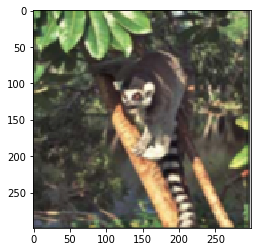

In [3]:

import tensorflow as tf
import numpy as np
import keras
from keras.datasets import cifar10
from keras.models import Sequential,Model
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,Input
from keras import backend as K
from keras.callbacks import TensorBoard
from keras.optimizers import SGD,Adam
from keras.applications import vgg16,resnet50,inception_resnet_v2,inception_v3,xception
from keras_preprocessing import image
import matplotlib.pylab as plt

modelos=["vgg16","InceptionV3","Resnet50","InceptionV4(Inception-ResnetV2)","Xception"]
respuestas=["container_ship","motor_scooter","leopard","mushroom","Madagascar_cat","dalmatian","marmot","tiger"]

for nim in range(5,6):
  im="C:/Users/jdiaz/Desktop/Redes/Imagenet/imagen_%d.png" % (nim)
  for Modelo in range(0,5):

    if(Modelo==0):
      img = image.load_img(im, target_size=(224, 224, 3))
      imagen = image.img_to_array(img)
      imagen = np.expand_dims(imagen, axis=0)
      from keras.applications.vgg16 import preprocess_input
      imagen = preprocess_input(imagen)
      modelo=vgg16.VGG16(weights='imagenet',include_top=True)
      #modelo.summary()
    if(Modelo==1):
      img = image.load_img(im, target_size=(299, 299, 3))
      imagen = image.img_to_array(img)
      imagen = np.expand_dims(imagen, axis=0)
      from keras.applications.inception_v3 import preprocess_input
      imagen = preprocess_input(imagen)
      modelo=inception_v3.InceptionV3(weights='imagenet',include_top=True)
      #modelo.summary()
    if(Modelo==2):
      img = image.load_img(im, target_size=(224, 224, 3))
      imagen = image.img_to_array(img)
      imagen = np.expand_dims(imagen, axis=0)
      from keras.applications.resnet50 import preprocess_input
      imagen = preprocess_input(imagen)
      modelo=resnet50.ResNet50(weights='imagenet',include_top=True)
      #modelo.summary()
    if(Modelo==3):
      img = image.load_img(im, target_size=(299, 299, 3))
      imagen = image.img_to_array(img)
      imagen = np.expand_dims(imagen, axis=0)
      from keras.applications.inception_resnet_v2 import preprocess_input
      imagen = preprocess_input(imagen)
      modelo=inception_resnet_v2.InceptionResNetV2(weights='imagenet',include_top=True)
      #modelo.summary()
    if(Modelo==4):
      img = image.load_img(im, target_size=(299, 299, 3))
      imagen = image.img_to_array(img)
      imagen = np.expand_dims(imagen, axis=0)
      from keras.applications.xception import preprocess_input
      imagen = preprocess_input(imagen)
      modelo=xception.Xception(weights='imagenet',include_top=True)
      #modelo.summary()

    prediccion=modelo.predict(imagen)

    from keras.applications.imagenet_utils import decode_predictions

    prediccion_decodificada=decode_predictions(prediccion)
    #prediccion_decodificada=np.array(prediccion_decodificada)
    print("La prediccion del modelo %s es %s con una probabilidad de %f" % (modelos[Modelo],prediccion_decodificada[0][0][1],prediccion_decodificada[0][0][2]*100))
  plt.figure(1)
  plt.imshow(image.img_to_array(img)/255)
  plt.show()

- La predición del barco carga contenedores InceptionV3 da el valormas bajo
- La predición de la moto escooter Inception V4 es la mas baja. Todos los algorimos indican que es una moto escooter
- Todos los Algoritmos indican que es un leopardo, el menor valor lo indica el Resnet50
- El hongo es determinado por todos los algoritmos
- El mono Indri es determinado por todos los algoritmos menos por Resnet50
- Todos los modelos determinan que efectivamente es un dálmata Resnet Muestra el mejor valor de probabilidad
- La marmota es determinada por todos los algoritmos, menos por Resnet50 que indica que es una suricata
- Todos los modelos indican que la imagen es un tigre, donde el algoritmo Xception determina con una probabilidad de 69%
- Todos los algoritmos indican que hay una relación con el caballo, con un porcentaje bajo de probabilidad